# Binomial European Option Pricing

## Define the Option Parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from StockOption import StockOption
from BinomialEuropeanOption import BinomialEuropeanOption

# Define option parameters
S0 = 50  # Initial European Option
K = 50  # Strike price
r = 0.05  # Risk-free rate
T = 0.5  # Time to maturity (in years)
N = 3  # Number of steps, at least 2 and above
option_params = {
    "pu": 0.2, 
    "pd": 0.2, 
    "div": 0.03, 
    "sigma": 0.2, 
    "is_call": True, # Call Option: True and Put Option: False 
    "is_eu": False
}


In [2]:
# Initializes an array `nodes` with the initial price.
nodes = [np.array([S0])] 

## Binomial Tree.

- Iterates through steps 1 to `N - 1` to create and initialize European option instances.
- Appends option prices to the `nodes` array.
- Constructs `final_nodes` array with zero padding.
- Plots the binomial tree:
  - Iterates through time steps and nodes within each step.
  - Plots upward and downward movements.
  - Annotates nodes with corresponding option prices.

[[50.  0.  0.]
 [60. 40.  0.]
 [72. 48. 32.]]


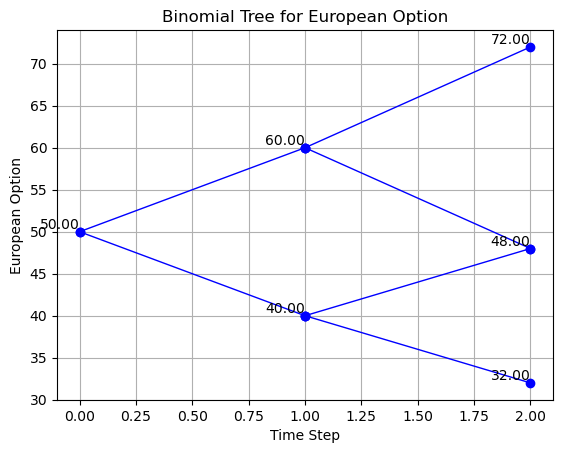

In [3]:
for i in range(1, N):
    # Create a European option instance
    option = BinomialEuropeanOption(S0, K, r, T, i, option_params)
    option.__setup_parameters__()
    option._initialize_stock_price_tree_()
    
    # Extend the array with the new European Options
    nodes.append(option.STs)

# Create the final nodes, filling with zeros where needed
final_nodes = np.array([np.pad(i, (0, N - len(i)), 'constant') for i in nodes])

# Display the final nodes
print(final_nodes)

# Plot the binomial tree
for i in range(N-1):  # Adjust loop to avoid accessing out of bounds
    for j in range(i+1):
        plt.plot([i, i+1], [final_nodes[i, j], final_nodes[i+1, j]], 'bo-', linewidth=1)  # Up movement
        plt.plot([i, i+1], [final_nodes[i, j], final_nodes[i+1, j+1]], 'bo-', linewidth=1)  # Down movement
        plt.text(i, final_nodes[i, j], f'{final_nodes[i, j]:.2f}', ha='right', va='bottom')

# Plot annotations for the last step (i.e., the leaf nodes of the binomial tree)
for j in range(N):
    plt.text(N-1, final_nodes[N-1, j], f'{final_nodes[N-1, j]:.2f}', ha='right', va='bottom')

plt.title('Binomial Tree for European Option')
plt.xlabel('Time Step')
plt.ylabel('European Option')
plt.grid(True)
plt.show()


# Terminal Payoffs


Terminal payoffs are the potential profits or losses of an option at its expiration date. They are calculated by evaluating the option's payoff function at each terminal node of the binomial tree. Terminal payoffs serve as the initial values for backward induction to compute option prices at earlier nodes of the tree.

In [4]:
# Get the terminal payoffs
terminal_payoffs = option._initialize_payoffs_tree_()
print("Terminal payoffs:", terminal_payoffs)

Terminal payoffs: [22.  0.  0.]


To compute the terminal stock prices `[72, 48, 32]` in a binomial tree model for option pricing based on a strike price ( K ) of 50 for call and put option. 

### Call Option Payoffs
For a call option, the payoff at expiration for each terminal stock price is calculated as:

Payoff = max(0, S_T - k)

Where:
- ( S_T ) is the stock price at expiration.
- ( K ) is the strike price of the option.

**Calculations**:
- For ( S_T = 72 ): ( max(72 - 50, 0) = 22 )
- For ( S_T = 48 ): ( max(48 - 50, 0) = 0 ) (The option is not exercised because the strike price is higher than the stock price.)
- For ( S_T = 32 ): ( max(32 - 50, 0) = 0 ) (Again, the option is not exercised.)

The terminal payoffs for the call option would be ([22, 0, 0]).

### Put Option Payoffs
For a put option, the payoff at expiration for each terminal stock price is calculated as:

Payoff = max(K - S_T, 0)


**Calculations**:
- For ( S_T = 72 ): ( max(50 - 72, 0) = 0 ) (The option is not exercised because the stock price is higher than the strike price.)
- For ( S_T = 48 ): ( max(50 - 48, 0) = 2 )
- For ( S_T = 32 ): ( max(50 - 32, 0) = 18 )

The terminal payoffs for the put option would be ([0, 2, 18]).

### Summary

- **Call Option Terminal Payoffs**: ([22, 0, 0])
- **Put Option Terminal Payoffs**: ([0, 2, 18])


# Price

The option price represents the current market value of the right to buy or sell an asset at a specified price within a set timeframe. In the binomial model, it's calculated by recursively moving backward through a tree, considering future payoffs and probabilities.

In [8]:
# Price the option using the complete binomial tree method
option_price = option.price()
print("The price of the option is:", round(option_price,3))

The price of the option is: 5.722


If the option is higher than the above, it is overpriced and suggesting it may not be a good call/put unless you expect volatility or other factors to change favorably. Conversely, if the market price is lower than the option could be considered a bargain, potentially offering a good excecution of call or put option.